In [22]:
# -*- coding: utf-8 -*-
# Create time: 2025-10-30
# Update time: 2025-11-27

# conda activate benchmark
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import scanpy as sc
import numpy as np
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7
sc._settings.settings._vector_friendly=True # 这个设置可以让umap的点为图片，但是分辨率很低，需要跟jpg结合使用

# cm 转 inch
cm_to_inch = 1 / 2.54

# 模型名称: 自定义标题
model_configs = {
    "sccello": "scCello",
    "nicheformer": "Nicheformer",
    "scgpt": "scGPT",
    "cellplm": "CellPLM",
    "scfoundation": "scFoundation",
    "genecompass": "GeneCompass",
    "pca": "PCA",
    "harmony": "Harmony",
    "scvi": "scVI",
    "scanorama": "Scanorama",
    "geneformer": "Geneformer",
    "uce": "UCE",
}


def plot_umap(model_configs, data_path, save_path, obs_columns, titles, figsize):

    models = list(model_configs.items())

    # 创建4行6列的布局
    fig, axs = plt.subplots(4, 6, figsize=figsize, gridspec_kw={'hspace': 0.15, 'wspace': 0})

    # 第1行（行号0）: 5个Cell type
    for col in range(6):
        model_name, custom_title = models[col]
        adata = sc.read(f"{data_path}/{model_name}/Embeddings_{model_name}.h5ad", backed='r')
        sc.pl.umap(adata, color=obs_columns[0], title='', s=0.3, show=False, ax=axs[0, col], legend_loc=None, frameon=False)
        axs[0, col].set_title(custom_title, fontsize=8, fontweight='bold')
        sc.pl.umap(adata, color=obs_columns[1], title='', s=0.3, show=False, ax=axs[1, col], legend_loc=None, frameon=False)

    # 第3行（行号2）: 5个Cell type
    for col in range(6):
        model_name, custom_title = models[col + 6]
        adata = sc.read(f"{data_path}/{model_name}/Embeddings_{model_name}.h5ad", backed='r')
        sc.pl.umap(adata, color=obs_columns[0], title='', s=0.3, show=False, ax=axs[2, col], legend_loc=None, frameon=False)
        axs[2, col].set_title(custom_title, fontsize=8, fontweight='bold')
        sc.pl.umap(adata, color=obs_columns[1], title='', s=0.3, show=False, ax=axs[3, col], legend_loc=None, frameon=False)

    # 添加左侧标题
    fig.text(0.1, 0.80, titles[0], fontsize=7, fontweight='bold', rotation=90, va='center')
    fig.text(0.1, 0.60, titles[1], fontsize=7, fontweight='bold', rotation=90, va='center')
    fig.text(0.1, 0.40, titles[0], fontsize=7, fontweight='bold', rotation=90, va='center')
    fig.text(0.1, 0.20, titles[1], fontsize=7, fontweight='bold', rotation=90, va='center')
    fig.text(0.07, 0.70, 'Foundation models', fontsize=9, fontweight='bold', rotation=90, va='center')
    fig.text(0.07, 0.30, 'Traditional methods', fontsize=9, fontweight='bold', rotation=90, va='center')

    plt.savefig(f"{save_path}/umap_all.jpg", dpi=600)
    plt.savefig(f"{save_path}/umap_all.pdf", dpi=600)
    plt.savefig(f"{save_path}/umap_all.svg", dpi=600)
    plt.show()
    plt.close()

def plot_umap_legend(model_configs, data_path, save_path, obs_columns, titles, figsize, ncols, legnedx):

    model_name = list(model_configs.items())[0][0]
    adata = sc.read(f"{data_path}/{model_name}/Embeddings_{model_name}.h5ad", backed='r')
    # 单独绘制图例
    fig_legend = plt.figure(figsize=figsize)
    ax_legend = fig_legend.add_subplot(111)
    ax_legend.axis('off')  # 隐藏坐标轴

    # 获取配色方案
    celltype_categories = adata.obs[obs_columns[0]].cat.categories
    batch_categories = adata.obs[obs_columns[1]].cat.categories
    celltype_palette = dict(zip(celltype_categories, adata.uns[f'{obs_columns[0]}_colors']))
    batch_palette = dict(zip(batch_categories, adata.uns[f'{obs_columns[1]}_colors']))

    # 创建图例句柄
    celltype_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                                markerfacecolor=celltype_palette[ct], markersize=7, alpha=0.9)
                    for ct in celltype_categories]
    batch_handles = [plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor=batch_palette[batch], markersize=7, alpha=0.9)
                    for batch in batch_categories]

    # 合并图例
    all_handles = celltype_handles + batch_handles
    all_labels = list(celltype_categories) + list(batch_categories)
    all_titles = [titles[0]] * len(celltype_categories) + [titles[1]] * len(batch_categories)

    # 绘制图例
    fig_legend.legend(celltype_handles, celltype_categories, title=titles[0], 
                    loc='upper center', fontsize=7, title_fontsize=8,
                    frameon=False, ncol=ncols[0], bbox_to_anchor=(legnedx[0], 1),
                    columnspacing=0.3, handletextpad=0.2)

    fig_legend.legend(batch_handles, batch_categories, title=titles[1], 
                    loc='upper center', fontsize=7, title_fontsize=8,
                    frameon=False, ncol=ncols[1], bbox_to_anchor=(legnedx[1], 1),
                    columnspacing=0.3, handletextpad=0.2)

    plt.savefig(f"{save_path}/umap_legend.jpg", dpi=600)
    plt.savefig(f"{save_path}/umap_legend.pdf", dpi=600)
    plt.savefig(f"{save_path}/umap_legend.svg", dpi=600)
    plt.show()
    plt.close()

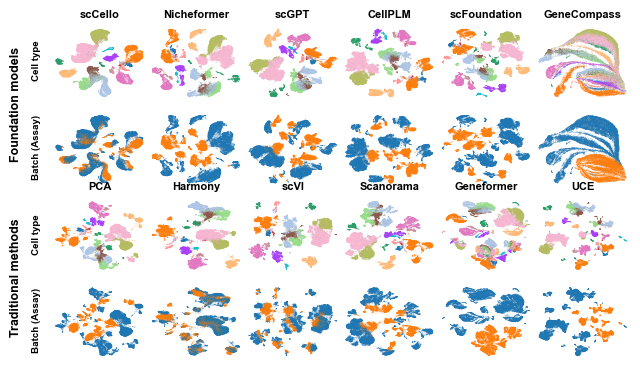

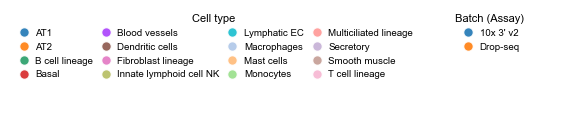

In [24]:
save_path = f"/home/wanglinting/scFM/Result/figure/HLCA_assay"  
os.makedirs(save_path, exist_ok=True)

obs_columns = ['final_annotation', 'assay']
titles = ['Cell type', 'Batch (Assay)']
data_path = f"/home/wanglinting/scFM/Result/HLCA_assay"

plot_umap(model_configs, data_path, save_path, obs_columns, titles, figsize=(19*cm_to_inch, 11*cm_to_inch))
plot_umap_legend(model_configs, data_path, save_path, obs_columns, titles, ncols=[4, 1], figsize=(17.5*cm_to_inch, 3*cm_to_inch), legnedx=[0.4, 0.8])

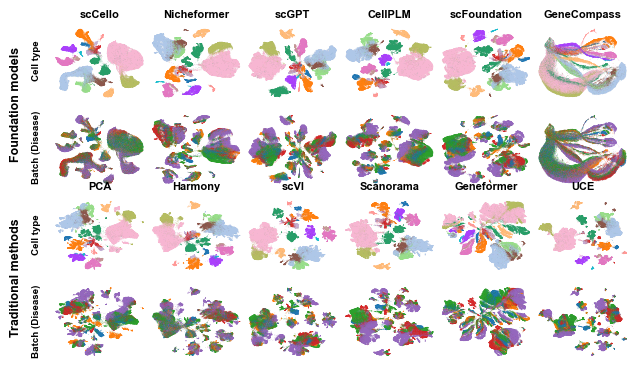

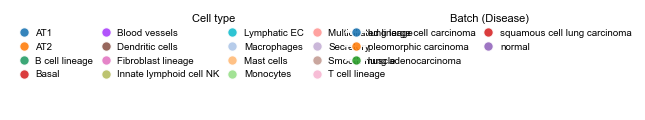

In [25]:
save_path = f"/home/wanglinting/scFM/Result/figure/HLCA_disease"  
os.makedirs(save_path, exist_ok=True)

obs_columns = ['final_annotation', 'disease']
titles = ['Cell type', 'Batch (Disease)']
data_path = f"/home/wanglinting/scFM/Result/HLCA_disease"

plot_umap(model_configs, data_path, save_path, obs_columns, titles, figsize=(19*cm_to_inch, 11*cm_to_inch))
plot_umap_legend(model_configs, data_path, save_path, obs_columns, titles, ncols=[4, 2], figsize=(17.5*cm_to_inch, 3*cm_to_inch), legnedx=[0.4, 0.8])

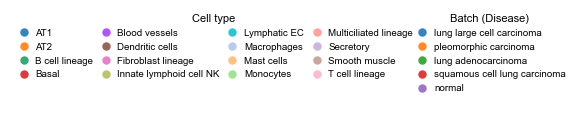

In [26]:
plot_umap_legend(model_configs, data_path, save_path, obs_columns, titles, ncols=[4, 1], figsize=(17.5*cm_to_inch, 3*cm_to_inch), legnedx=[0.4, 0.8])

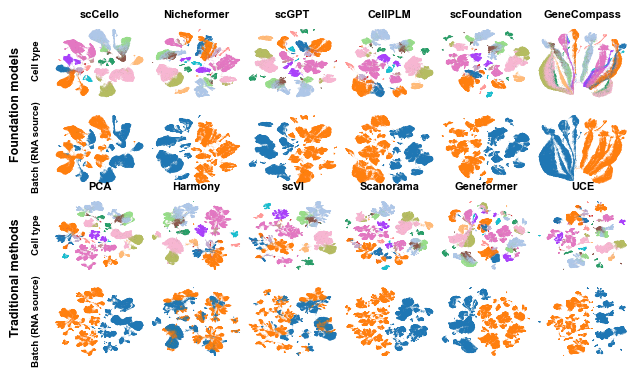

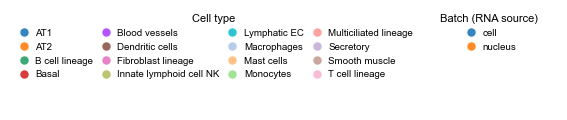

In [27]:
save_path = f"/home/wanglinting/scFM/Result/figure/HLCA_sn"  
os.makedirs(save_path, exist_ok=True)

models = list(model_configs.items())

obs_columns = ['final_annotation', 'suspension_type']
titles = ['Cell type', 'Batch (RNA source)']
data_path = f"/home/wanglinting/scFM/Result/HLCA_sn"

plot_umap(model_configs, data_path, save_path, obs_columns, titles,  figsize=(19*cm_to_inch, 11*cm_to_inch))
plot_umap_legend(model_configs, data_path, save_path, obs_columns, titles, ncols=[4, 1], figsize=(17.5*cm_to_inch, 3*cm_to_inch), legnedx=[0.4, 0.8])

/home/wanglinting/Software/anaconda3/envs/benchmark/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


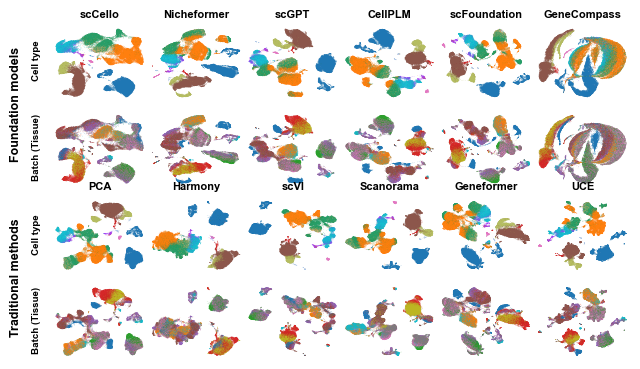

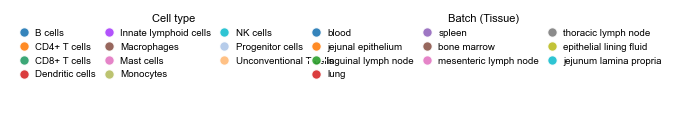

In [28]:
save_path = f"/home/wanglinting/scFM/Result/figure/Immune"  
os.makedirs(save_path, exist_ok=True)

models = list(model_configs.items())

obs_columns = ['cell_type_level_2', 'tissue']
titles = ['Cell type', 'Batch (Tissue)']
data_path = f"/home/wanglinting/scFM/Result/Immune"

plot_umap(model_configs, data_path, save_path, obs_columns, titles,  figsize=(19*cm_to_inch, 11*cm_to_inch))
plot_umap_legend(model_configs, data_path, save_path, obs_columns, titles, figsize=(17.5*cm_to_inch, 3*cm_to_inch), ncols=[3, 3], legnedx=[0.25, 0.7])


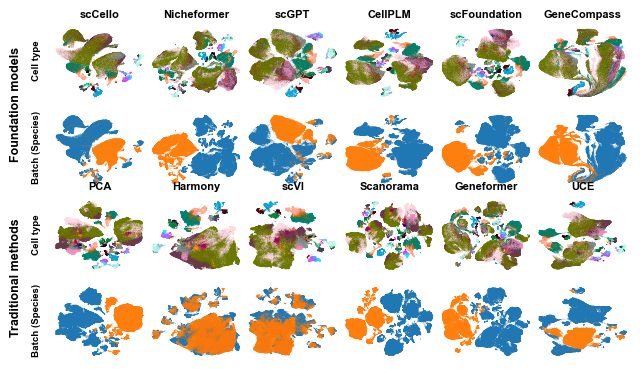

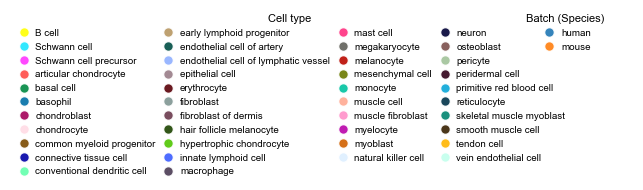

In [29]:
save_path = f"/home/wanglinting/scFM/Result/figure/limb"  
os.makedirs(save_path, exist_ok=True)

models = list(model_configs.items())

obs_columns = ['cell_type', 'organism']
titles = ['Cell type', 'Batch (Species)']
data_path = f"/home/wanglinting/scFM/Result/limb"

plot_umap(model_configs, data_path, save_path, obs_columns, titles,  figsize=(19*cm_to_inch, 11*cm_to_inch))
plot_umap_legend(model_configs, data_path, save_path, obs_columns, titles, figsize=(17.5*cm_to_inch, 3*cm_to_inch), ncols=[4, 1], legnedx=[0.4, 0.8])

/home/wanglinting/Software/anaconda3/envs/benchmark/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


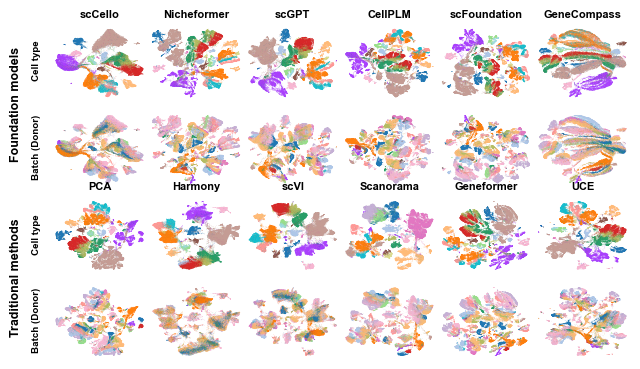

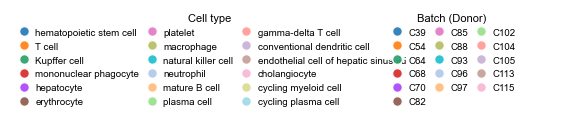

In [30]:
save_path = f"/home/wanglinting/scFM/Result/figure/liver"  
os.makedirs(save_path, exist_ok=True)

models = list(model_configs.items())

obs_columns = ['cell_type', 'donor_id']
titles = ['Cell type', 'Batch (Donor)']
data_path = f"/home/wanglinting/scFM/Result/liver"

plot_umap(model_configs, data_path, save_path, obs_columns, titles,  figsize=(19*cm_to_inch, 11*cm_to_inch))
plot_umap_legend(model_configs, data_path, save_path, obs_columns, titles, figsize=(17.5*cm_to_inch, 3*cm_to_inch), ncols=[3, 3], legnedx=[0.4, 0.75])